# [R 이용한 데이터 wrangling논쟁](https://hyunyulhenry.github.io/data_wrangling/numbers.html)

## 데이터 불러오기 및 내보내기![write.png](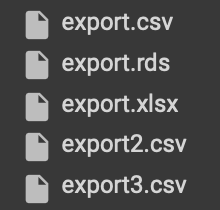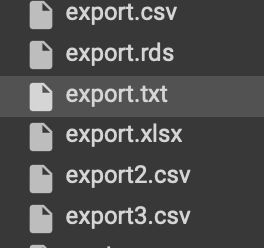)

```
download.file('https://raw.githubusercontent.com/hyunyulhenry/data_wrangling/master/mydata.csv', 'mydata.csv')
download.file('https://raw.githubusercontent.com/hyunyulhenry/data_wrangling/master/mydata.txt', 'mydata.txt')
download.file('https://github.com/hyunyulhenry/data_wrangling/raw/master/mydata.xlsx','mydata.xlsx', mode = 'wb')
download.file('https://github.com/hyunyulhenry/data_wrangling/raw/master/mydata.rds','mydata.rds')
```

# Import Data

```
library(readr)
library(readxl)

read.csv
read.delim
read.xlsx
readRDS

read_csv
read_excel
read.table
```

In [1]:
download.file('https://raw.githubusercontent.com/hyunyulhenry/data_wrangling/master/mydata.csv', 'mydata.csv')
download.file('https://raw.githubusercontent.com/hyunyulhenry/data_wrangling/master/mydata.txt', 'mydata.txt')
download.file('https://github.com/hyunyulhenry/data_wrangling/raw/master/mydata.xlsx','mydata.xlsx', mode = 'wb')
download.file('https://github.com/hyunyulhenry/data_wrangling/raw/master/mydata.rds','mydata.rds')

In [16]:
install.packages("openxlsx")
library(openxlsx)

csv = read.csv('mydata.csv')
txt = read.delim('mydata.txt')
xlsx = read.xlsx('mydata.xlsx', sheet='Sheet1')
rds = readRDS('mydata.rds') # R object file

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'mydata.csv'”
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'mydata.txt'”


In [19]:
csv
txt
xlsx
rds # 열 이름이 혼자 V1

variable.1,variable.2,variable.3
<int>,<chr>,<lgl>
10,beer,TRUE
25,wine,TRUE
8,cheese,FALSE


variable.1.variable.2.variable.3
<chr>
"10,beer,TRUE"
"25,wine,TRUE"
"8,cheese,FALSE"


,variable.1,variable.2,variable.3
,<dbl>,<chr>,<lgl>
1,10,beer,TRUE
2,25,wine,TRUE
3,8,cheese,FALSE


V1,V2,V3
<fct>,<fct>,<fct>
variable 1,variable 2,variable 3
10,beer,TRUE
25,wine,TRUE
8,cheese,FALSE


In [20]:
str(csv)
str(txt)
str(xlsx)
str(rds)

'data.frame':	3 obs. of  3 variables:
 $ variable.1: int  10 25 8
 $ variable.2: chr  "beer" "wine" "cheese"
 $ variable.3: logi  TRUE TRUE FALSE
'data.frame':	3 obs. of  1 variable:
 $ variable.1.variable.2.variable.3: chr  "10,beer,TRUE" "25,wine,TRUE" "8,cheese,FALSE"
'data.frame':	3 obs. of  3 variables:
 $ variable.1: num  10 25 8
 $ variable.2: chr  "beer" "wine" "cheese"
 $ variable.3: logi  TRUE TRUE FALSE
'data.frame':	4 obs. of  3 variables:
 $ V1: Factor w/ 4 levels "10","25","8",..: 4 1 2 3
 $ V2: Factor w/ 4 levels "beer","cheese",..: 3 1 4 2
 $ V3: Factor w/ 3 levels "FALSE","TRUE",..: 3 2 2 1


In [21]:
csv2=read.table('mydata.csv', sep=',', header=TRUE)
txt2=read.table('mydata.txt', sep=',', header=TRUE)

Warning message in read.table("mydata.csv", sep = ",", header = TRUE):
“incomplete final line found by readTableHeader on 'mydata.csv'”
Warning message in read.table("mydata.txt", sep = ",", header = TRUE):
“incomplete final line found by readTableHeader on 'mydata.txt'”


In [24]:
csv2
txt2

variable.1,variable.2,variable.3
<int>,<chr>,<lgl>
10,beer,TRUE
25,wine,TRUE
8,cheese,FALSE


variable.1,variable.2,variable.3
<int>,<chr>,<lgl>
10,beer,TRUE
25,wine,TRUE
8,cheese,FALSE


In [60]:
?read.table

In [38]:
csv3 = read.table("mydata.csv", sep=',', header=T,
                    row.names=c('Row 1', 'Row 2', 'Row 3'),
                    col.names=c('Var 1', 'Var 2', 'Var 3'))
csv3


csv4 = read.table('mydata.csv', sep = ',', header = T,
                    colClasses = c("numeric", 'character', 'character'))
str(csv4)

csv5 = read.table("mydata.csv", sep=',', header=T,
                    nrows=2)
csv5

Warning message in read.table("mydata.csv", sep = ",", header = T, row.names = c("Row 1", :
“incomplete final line found by readTableHeader on 'mydata.csv'”


,Var.1,Var.2,Var.3
,<int>,<chr>,<lgl>
Row 1,10,beer,TRUE
Row 2,25,wine,TRUE
Row 3,8,cheese,FALSE


Warning message in read.table("mydata.csv", sep = ",", header = T, colClasses = c("numeric", :
“incomplete final line found by readTableHeader on 'mydata.csv'”


'data.frame':	3 obs. of  3 variables:
 $ variable.1: num  10 25 8
 $ variable.2: chr  "beer" "wine" "cheese"
 $ variable.3: chr  "TRUE" "TRUE" "FALSE"


variable.1,variable.2,variable.3
<int>,<chr>,<lgl>
10,beer,TRUE
25,wine,TRUE


In [40]:
library(readr)
library(readxl)

csv6 = read_csv('mydata.csv')
xlsx2= read_excel('mydata.xlsx', sheet="Sheet5")

Rows: 3 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): variable 2
dbl (1): variable 1
lgl (1): variable 3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [41]:
csv6

variable 1,variable 2,variable 3
<dbl>,<chr>,<lgl>
10,beer,TRUE
25,wine,TRUE
8,cheese,FALSE


In [42]:
xlsx2

Variable 1,Variable 2,Variable 3,Variable 4,Variable 5
<dbl>,<chr>,<dbl>,<dttm>,<dttm>
10,beer,1,2015-11-20,2015-11-20 13:30:00
25,wine,1,NA,2015-11-21 16:30:00
8,NA,0,2015-11-22,2015-11-22 14:45:00


In [48]:
read_csv("mydata.csv", col_types=list(col_double(),
                                        col_character(),
                                        col_character()))

read_csv("mydata.csv", col_names=c('Var 1', "Var 2", "Var 3"),
        skip=1)

variable 1,variable 2,variable 3
<dbl>,<chr>,<chr>
10,beer,TRUE
25,wine,TRUE
8,cheese,FALSE


Rows: 3 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Var 2
dbl (1): Var 1
lgl (1): Var 3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Var 1,Var 2,Var 3
<dbl>,<chr>,<lgl>
10,beer,TRUE
25,wine,TRUE
8,cheese,FALSE


In [55]:
read.xlsx('mydata.xlsx', sheet="Sheet3", rows=3:5)

read_excel("mydata.xlsx", sheet="Sheet5", skip=1, col_names=paste("Var", 1:5))

read_excel("mydata.xlsx", sheet="Sheet6")
read_excel("mydata.xlsx", sheet="Sheet6", na='999') # 999 값을 NA 로.

,variable.6,variable.7
,<dbl>,<chr>
1,200,Male
2,225,Female


Var 1,Var 2,Var 3,Var 4,Var 5
<dbl>,<chr>,<dbl>,<dttm>,<dttm>
10,beer,1,2015-11-20,2015-11-20 13:30:00
25,wine,1,NA,2015-11-21 16:30:00
8,NA,0,2015-11-22,2015-11-22 14:45:00


variable 1,variable 2,variable 3,variable 4
<dbl>,<chr>,<dbl>,<dbl>
10,beer,3,42328
25,wine,1,999
8,999,0,42330


variable 1,variable 2,variable 3,variable 4
<dbl>,<chr>,<dbl>,<dbl>
10,beer,3,42328
25,wine,1,NA
8,NA,0,42330


In [61]:
?read_csv

In [58]:
read_excel('mydata.xlsx', sheet="Sheet5")

read_excel('mydata.xlsx', sheet="Sheet5",
            col_type=c("numeric", 'blank', 'numeric', 'blank', 'date'))

Variable 1,Variable 2,Variable 3,Variable 4,Variable 5
<dbl>,<chr>,<dbl>,<dttm>,<dttm>
10,beer,1,2015-11-20,2015-11-20 13:30:00
25,wine,1,NA,2015-11-21 16:30:00
8,NA,0,2015-11-22,2015-11-22 14:45:00


`col_type = "blank"` deprecated. Use "skip" instead.



Variable 1,Variable 3,Variable 5
<dbl>,<dbl>,<dttm>
10,1,2015-11-20 13:30:00
25,1,2015-11-21 16:30:00
8,0,2015-11-22 14:45:00


# Exporting Data
save

In [62]:
df = data.frame(var1=c(10, 5, 8),
                var2=c("beer", "wine", 'cheese'),
                var3=c(T,T,F),
                row.names=c('billy',"bob","thornton"))
df

,var1,var2,var3
,<dbl>,<chr>,<lgl>
billy,10,beer,TRUE
bob,5,wine,TRUE
thornton,8,cheese,FALSE


In [65]:
# csv -> fileEncoding='UTF-8'
write.csv(df, file='export.csv')

write.table(df, file='export.txt', sep='\t')

library(readr) # 2배 빠르나 행 이름 저장하지 않는다.
write_csv(df, "export2.csv")
write_csv(df, "export3.csv", col_names=FALSE)

library(openxlsx)
write.xlsx(df, "export.xlsx")

saveRDS(df, "export.rds")